<a href="https://colab.research.google.com/github/amathie5/projet-breast-cancer/blob/main/datascience_project_breastcancer_v8_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [44]:
#CSV files importation
df1 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df2.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df3.csv')

#Concatening all dataframes together to be left with one unique dataframe
df = pd.concat([df1,df2,df3]).sort_values(by='year')
df_encoded = df.copy()

#Displaying the head of the dataset
display(df.head())

# Number of variables (columns)
num_variables = df.shape[1]

# Number of observations (lines)
num_observations = df.shape[0]

# Total number of values
total_values = df.size  # équivalent à num_variables * num_observations

# Affichage
print(f'The dataset contains a total of {num_variables} variables and {num_observations} observations, for a total of {total_values} values')
print(f'The dataset contains no null value and every variable is of type int64')
display(df.info())



,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
20,2005,1,1,0,1,0,2,0,1,1,0,0,1
19,2005,1,1,0,0,9,4,0,1,9,9,9,1
18,2005,1,1,0,0,9,4,0,1,1,0,0,1
7,2005,1,1,0,0,4,2,0,1,1,0,0,1
6,2005,1,1,0,0,2,3,0,1,9,0,0,1


The dataset contains a total of 13 variables and 1522340 observations, for a total of 19790420 values
The dataset contains no null value and every variable is of type int64
<class 'pandas.core.frame.DataFrame'>
Index: 1522340 entries, 20 to 411300
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype
---  ------                 --------------    -----
 0   year                   1522340 non-null  int64
 1   age_group_5_years      1522340 non-null  int64
 2   race_eth               1522340 non-null  int64
 3   first_degree_hx        1522340 non-null  int64
 4   age_menarche           1522340 non-null  int64
 5   age_first_birth        1522340 non-null  int64
 6   BIRADS_breast_density  1522340 non-null  int64
 7   current_hrt            1522340 non-null  int64
 8   menopaus               1522340 non-null  int64
 9   bmi_group              1522340 non-null  int64
 10  biophx                 1522340 non-null  int64
 11  breast_cancer_history  1522340 non-nul

None

In [45]:
age_map = {1:'18-29',2:'30-34',3:'35-39',4:'40-44',5:'45-49',6:'50-54',7:'55-59',8:'60-64',9:'65-69',10:'70-74',11:'75-79',12:'80-84',13:'85+'}
race_map = {1:'non-hispanic white', 2:'non-hispanic black', 3:'asian/pacific islander', 4:'native american',5:'hispanic',6:'other/mixed',9:'unknown'}
familyhx_map = {0:'no', 1:'yes', 9:'unknown'}
menarche_map = {0:'14+',1:'12-13',2:'<12',9:'unknown'}
firstbirth_map = {0:'<20',1:'20-24',2:'25-29',3:'30+',4:'nulliparous',9:'unknown'}
BIRADS_map = {1:'fatty',2:'scattered',3:'heterogeneously dense', 4:'extremely dense', 5:'unknown'}
hrt_map = {0:'no', 1:'yes',9:'unknown'}
menopaus_map = {1:'pre-menopausal',2:'post-menopausal',3:'surgical menopause', 9:'unknown'}
bmi_map = {1:'10-24.99',2:'25-29.99',3:'30-34.99',4:'35+',9:'unknown'}
biophx_map = {0:'no',1:'yes', 9:'unknown'}
history_map = {0:'no',1:'yes',9:'unknown'}

#Replacing the code with the categories
df['age_group_5_years']=df['age_group_5_years'].map(age_map)
df['race_eth']=df['race_eth'].map(race_map)
df['first_degree_hx']=df['first_degree_hx'].map(familyhx_map)
df['age_menarche']=df['age_menarche'].map(age_map)
df['age_first_birth']=df['age_first_birth'].map(firstbirth_map)
df['BIRADS_breast_density']=df['BIRADS_breast_density'].map(BIRADS_map)
df['current_hrt']=df['current_hrt'].map(hrt_map)
df['menopaus']=df['menopaus'].map(menopaus_map)
df['bmi_group']=df['bmi_group'].map(bmi_map)
df['biophx']=df['biophx'].map(biophx_map)
df['breast_cancer_history']=df['breast_cancer_history'].map(history_map)

#convert as category
cat_cols = ['age_group_5_years','race_eth','first_degree_hx','age_menarche','age_first_birth','BIRADS_breast_density','current_hrt','menopaus','bmi_group','biophx','breast_cancer_history']
df[cat_cols] = df[cat_cols].astype('category')
display(df.head())
df.info()
df.isna().sum()




,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
20,2005,18-29,non-hispanic white,no,18-29,<20,scattered,no,pre-menopausal,10-24.99,no,no,1
19,2005,18-29,non-hispanic white,no,NaN,unknown,extremely dense,no,pre-menopausal,unknown,unknown,unknown,1
18,2005,18-29,non-hispanic white,no,NaN,unknown,extremely dense,no,pre-menopausal,10-24.99,no,no,1
7,2005,18-29,non-hispanic white,no,NaN,nulliparous,scattered,no,pre-menopausal,10-24.99,no,no,1
6,2005,18-29,non-hispanic white,no,NaN,25-29,heterogeneously dense,no,pre-menopausal,unknown,no,no,1


<class 'pandas.core.frame.DataFrame'>
Index: 1522340 entries, 20 to 411300
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   year                   1522340 non-null  int64   
 1   age_group_5_years      1522340 non-null  category
 2   race_eth               1522340 non-null  category
 3   first_degree_hx        1522340 non-null  category
 4   age_menarche           1265795 non-null  category
 5   age_first_birth        1522340 non-null  category
 6   BIRADS_breast_density  1343329 non-null  category
 7   current_hrt            1522340 non-null  category
 8   menopaus               1522340 non-null  category
 9   bmi_group              1522340 non-null  category
 10  biophx                 1522340 non-null  category
 11  breast_cancer_history  1522340 non-null  category
 12  count                  1522340 non-null  int64   
dtypes: category(11), int64(2)
memory usage: 50.8 MB


,0
year,0
age_group_5_years,0
race_eth,0
first_degree_hx,0
age_menarche,256545
age_first_birth,0
BIRADS_breast_density,179011
current_hrt,0
menopaus,0
bmi_group,0


In [46]:
#replace unknown values by nan
df = df.replace('unknown',np.nan)

#check for duplicates
print(df.duplicated().sum())

#the total number of observations should be 6'788'436
print(df['count'].sum())


/tmp/ipython-input-3569221684.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df = df.replace('unknown',np.nan)


0
6788436


In [47]:
#create two binary variables for high BIRADS and cancer history
df['BIRADS_high']=np.where(df_encoded['BIRADS_breast_density'].isin([3,4]),1,0)
df['breast_cancer_history_bin']=np.where(df_encoded['breast_cancer_history']==1,1,0)

#check the distribution
display(df['BIRADS_high'])
display(df['breast_cancer_history_bin'])

display(df.head())

,BIRADS_high
20,0
19,1
18,1
7,0
6,1
...,...
411304,1
411303,1
411302,1
411301,1


,breast_cancer_history_bin
20,0
19,0
18,0
7,0
6,0
...,...
411304,0
411303,0
411302,0
411301,0


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,BIRADS_high,breast_cancer_history_bin
20,2005,18-29,non-hispanic white,no,18-29,<20,scattered,no,pre-menopausal,10-24.99,no,no,1,0,0
19,2005,18-29,non-hispanic white,no,NaN,NaN,extremely dense,no,pre-menopausal,NaN,NaN,NaN,1,1,0
18,2005,18-29,non-hispanic white,no,NaN,NaN,extremely dense,no,pre-menopausal,10-24.99,no,no,1,1,0
7,2005,18-29,non-hispanic white,no,NaN,nulliparous,scattered,no,pre-menopausal,10-24.99,no,no,1,0,0
6,2005,18-29,non-hispanic white,no,NaN,25-29,heterogeneously dense,no,pre-menopausal,NaN,no,no,1,1,0


In [48]:
#check types and unique values
for col in cat_cols:
  print(col, ':',df[col].unique())

age_group_5_years : ['18-29', '85+', '30-34', '35-39', '40-44', ..., '60-64', '65-69', '70-74', '75-79', '80-84']
Length: 13
Categories (13, object): ['18-29', '30-34', '35-39', '40-44', ..., '70-74', '75-79', '80-84', '85+']
race_eth : ['non-hispanic white', NaN, 'non-hispanic black', 'asian/pacific islander', 'hispanic', 'native american', 'other/mixed']
Categories (6, object): ['asian/pacific islander', 'hispanic', 'native american', 'non-hispanic black',
                         'non-hispanic white', 'other/mixed']
first_degree_hx : ['no', NaN, 'yes']
Categories (2, object): ['no', 'yes']
age_menarche : ['18-29', NaN, '65-69', '30-34']
Categories (3, object): ['18-29', '30-34', '65-69']
age_first_birth : ['<20', NaN, 'nulliparous', '25-29', '20-24', '30+']
Categories (5, object): ['20-24', '25-29', '30+', '<20', 'nulliparous']
BIRADS_breast_density : ['scattered', 'extremely dense', 'heterogeneously dense', NaN, 'fatty']
Categories (4, object): ['extremely dense', 'fatty', 'heterog

In [49]:
df_cleaned = df.dropna()
df_cleaned.info()
display(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 421880 entries, 20 to 411307
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   year                       421880 non-null  int64   
 1   age_group_5_years          421880 non-null  category
 2   race_eth                   421880 non-null  category
 3   first_degree_hx            421880 non-null  category
 4   age_menarche               421880 non-null  category
 5   age_first_birth            421880 non-null  category
 6   BIRADS_breast_density      421880 non-null  category
 7   current_hrt                421880 non-null  category
 8   menopaus                   421880 non-null  category
 9   bmi_group                  421880 non-null  category
 10  biophx                     421880 non-null  category
 11  breast_cancer_history      421880 non-null  category
 12  count                      421880 non-null  int64   
 13  BIRADS_high       

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,BIRADS_high,breast_cancer_history_bin
20,2005,18-29,non-hispanic white,no,18-29,<20,scattered,no,pre-menopausal,10-24.99,no,no,1,0,0
51,2005,18-29,non-hispanic white,no,30-34,<20,scattered,no,pre-menopausal,30-34.99,no,no,1,0,0
50,2005,18-29,non-hispanic white,no,30-34,<20,scattered,no,pre-menopausal,25-29.99,no,no,1,0,0
39,2005,18-29,non-hispanic white,no,18-29,nulliparous,extremely dense,no,pre-menopausal,25-29.99,yes,no,1,1,0
82,2005,18-29,non-hispanic white,no,65-69,<20,extremely dense,no,pre-menopausal,10-24.99,yes,no,1,1,0


In [50]:

df_cleaned_descr = df_cleaned.describe(include = 'all')
df_cleaned_descr['year'] = df_cleaned_descr['year'].round(0)
display(df_cleaned_descr)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,BIRADS_high,breast_cancer_history_bin
count,421880.0,421880,421880,421880,421880,421880,421880,421880,421880,421880,421880,421880,421880.000000,421880.000000,421880.000000
unique,NaN,13,6,2,3,5,4,2,3,4,2,2,NaN,NaN,NaN
top,NaN,50-54,non-hispanic white,no,65-69,nulliparous,scattered,no,post-menopausal,10-24.99,no,no,NaN,NaN,NaN
freq,NaN,69695,209934,287325,182648,96413,153474,377381,255542,128765,245154,352596,NaN,NaN,NaN
mean,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.513696,0.477465,0.164227
std,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.043819,0.499493,0.370482
min,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
50%,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000
75%,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,0.000000


Certaines combinaisons reviennent très fréquemment (1093 fois) alors que certains ne sont présente que une fois. En moyenne les combinaisons apparaissent 5,5 fois.
En moyenne 47,75% des femmes ont une densité mammaire élevée et 16,42% ont été diagnostiquées avec un cancer dans le passé.

/tmp/ipython-input-1928707795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned_agg = df_cleaned.groupby(cat_cols, as_index=False)['count'].sum()


,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
0,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,no,no,0
1,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,no,yes,0
2,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,yes,no,0
3,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,yes,yes,0
4,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,25-29.99,no,no,0


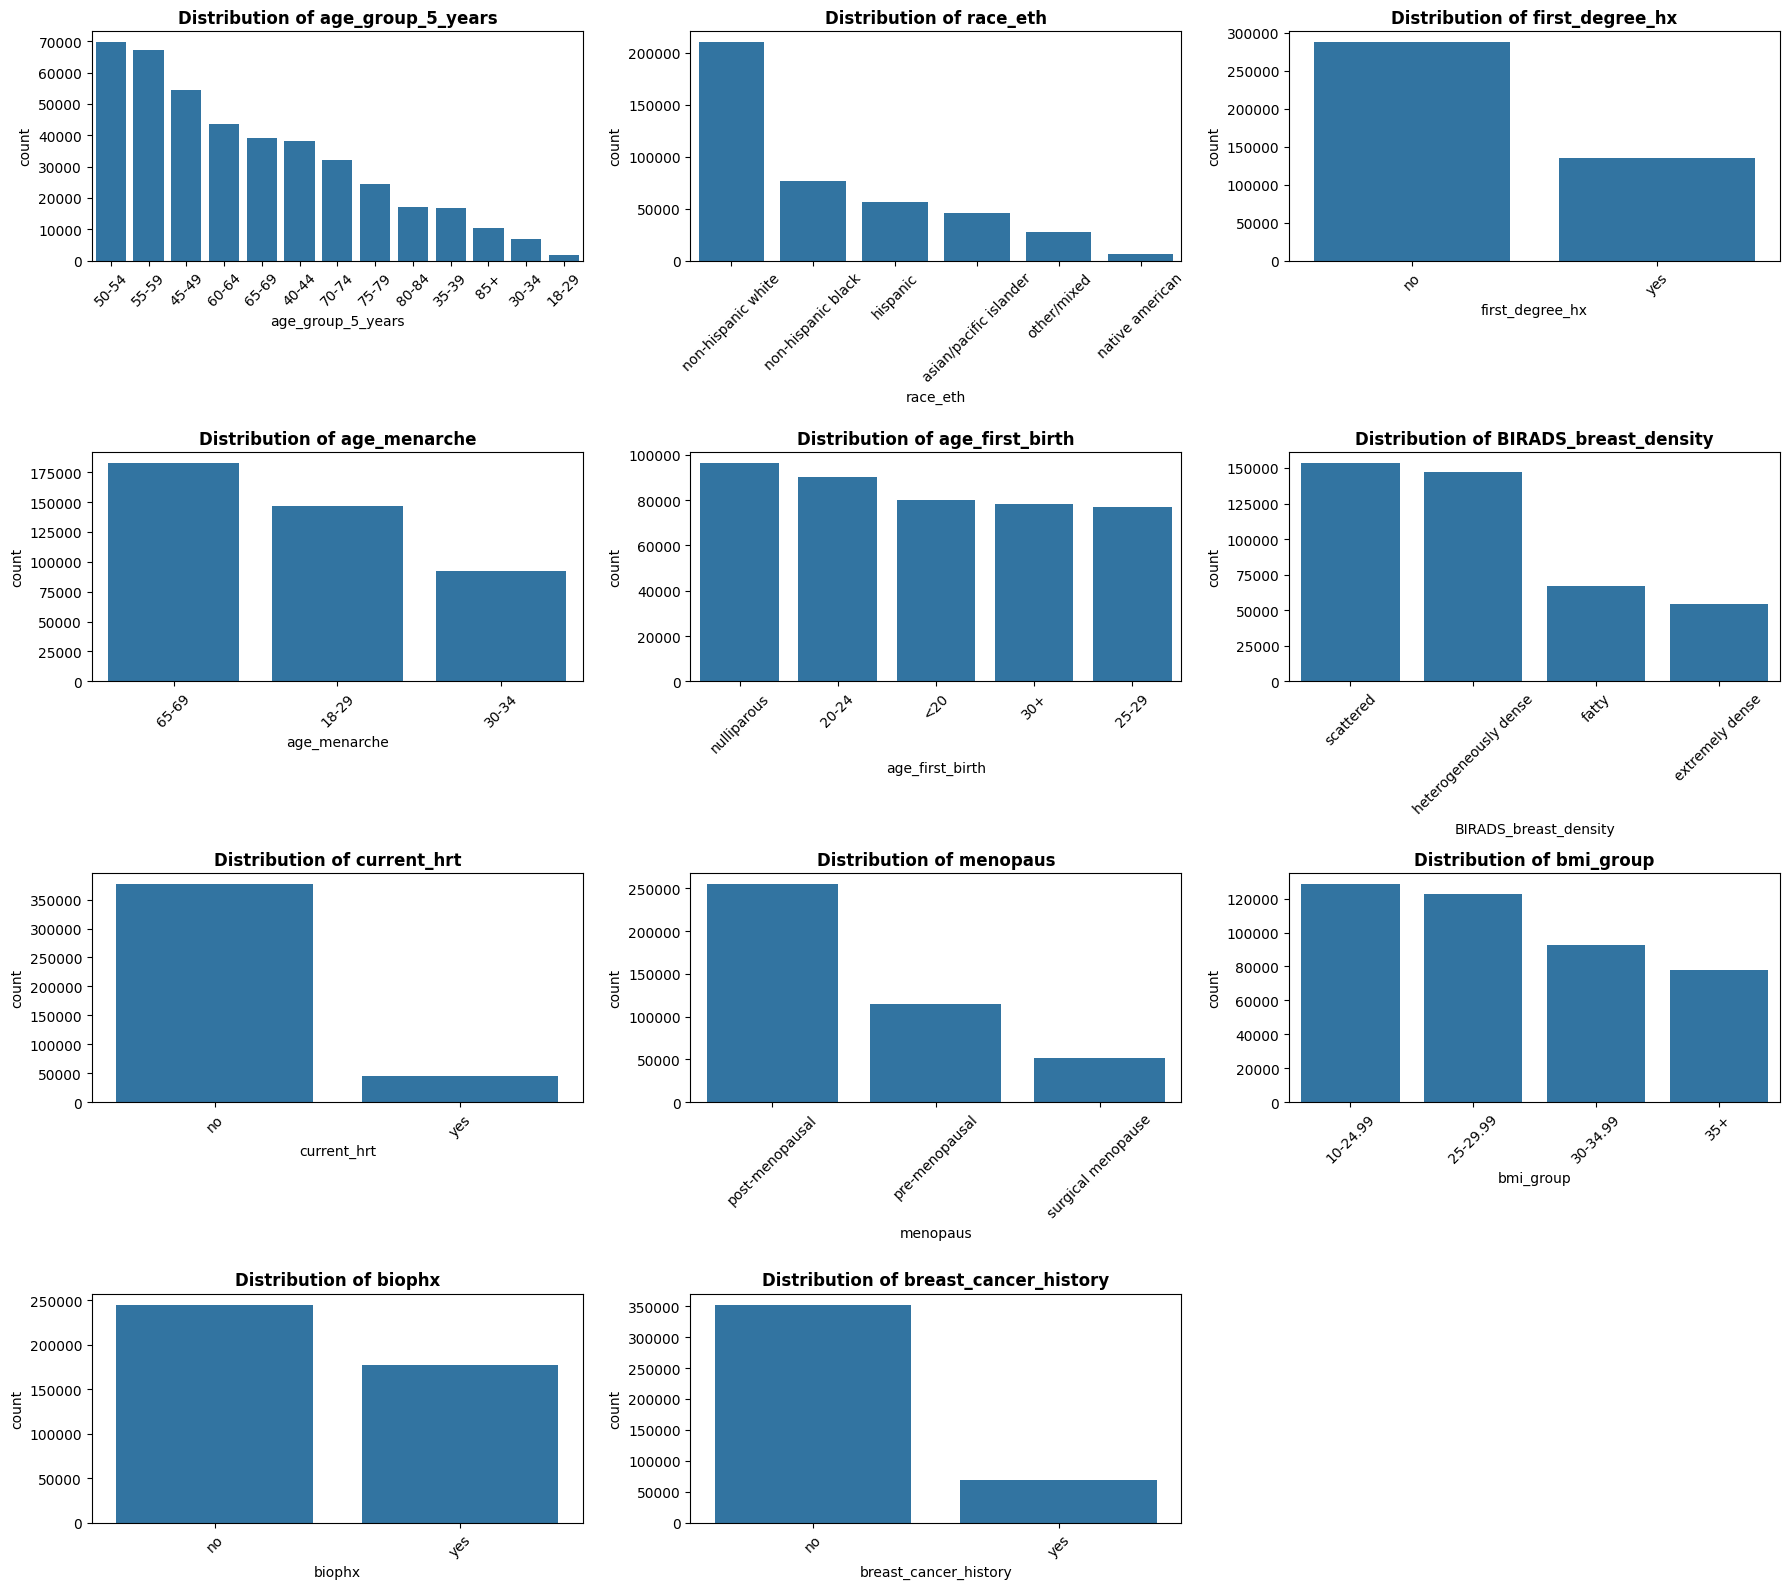

In [51]:
df_cleaned_agg = df_cleaned.groupby(cat_cols, as_index=False)['count'].sum()
display(df_cleaned_agg.head())

n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df_cleaned, x=col, ax=axes[i], order=df_cleaned[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Distribution de base, observer s'il y a des catégories qui dominent ou des déséquilibres (beaucoup de femmes post ménopausées,...)

In [52]:
#calcul proportion femme avec densité mammaire élevée et proportion femme avec un antécédent de cancer
p_birads_high = (df_cleaned['BIRADS_high'] * df_cleaned['count']).sum() / df_cleaned['count'].sum()
p_history = (df_cleaned['breast_cancer_history_bin'] * df_cleaned['count']).sum() / df_cleaned['count'].sum()
print(f'Proportion with high breast density : {p_birads_high:.2%}')
print(f'Proportion with prior breast cancer : {p_history:.2%}')

Proportion with high breast density : 48.88%
Proportion with prior breast cancer : 6.63%


/tmp/ipython-input-4086255362.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = df_cleaned.groupby(col)['BIRADS_high'].mean().reset_index()
/tmp/ipython-input-4086255362.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = df_cleaned.groupby(col)['BIRADS_high'].mean().reset_index()
/tmp/ipython-input-4086255362.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = df_cleaned.groupby(col

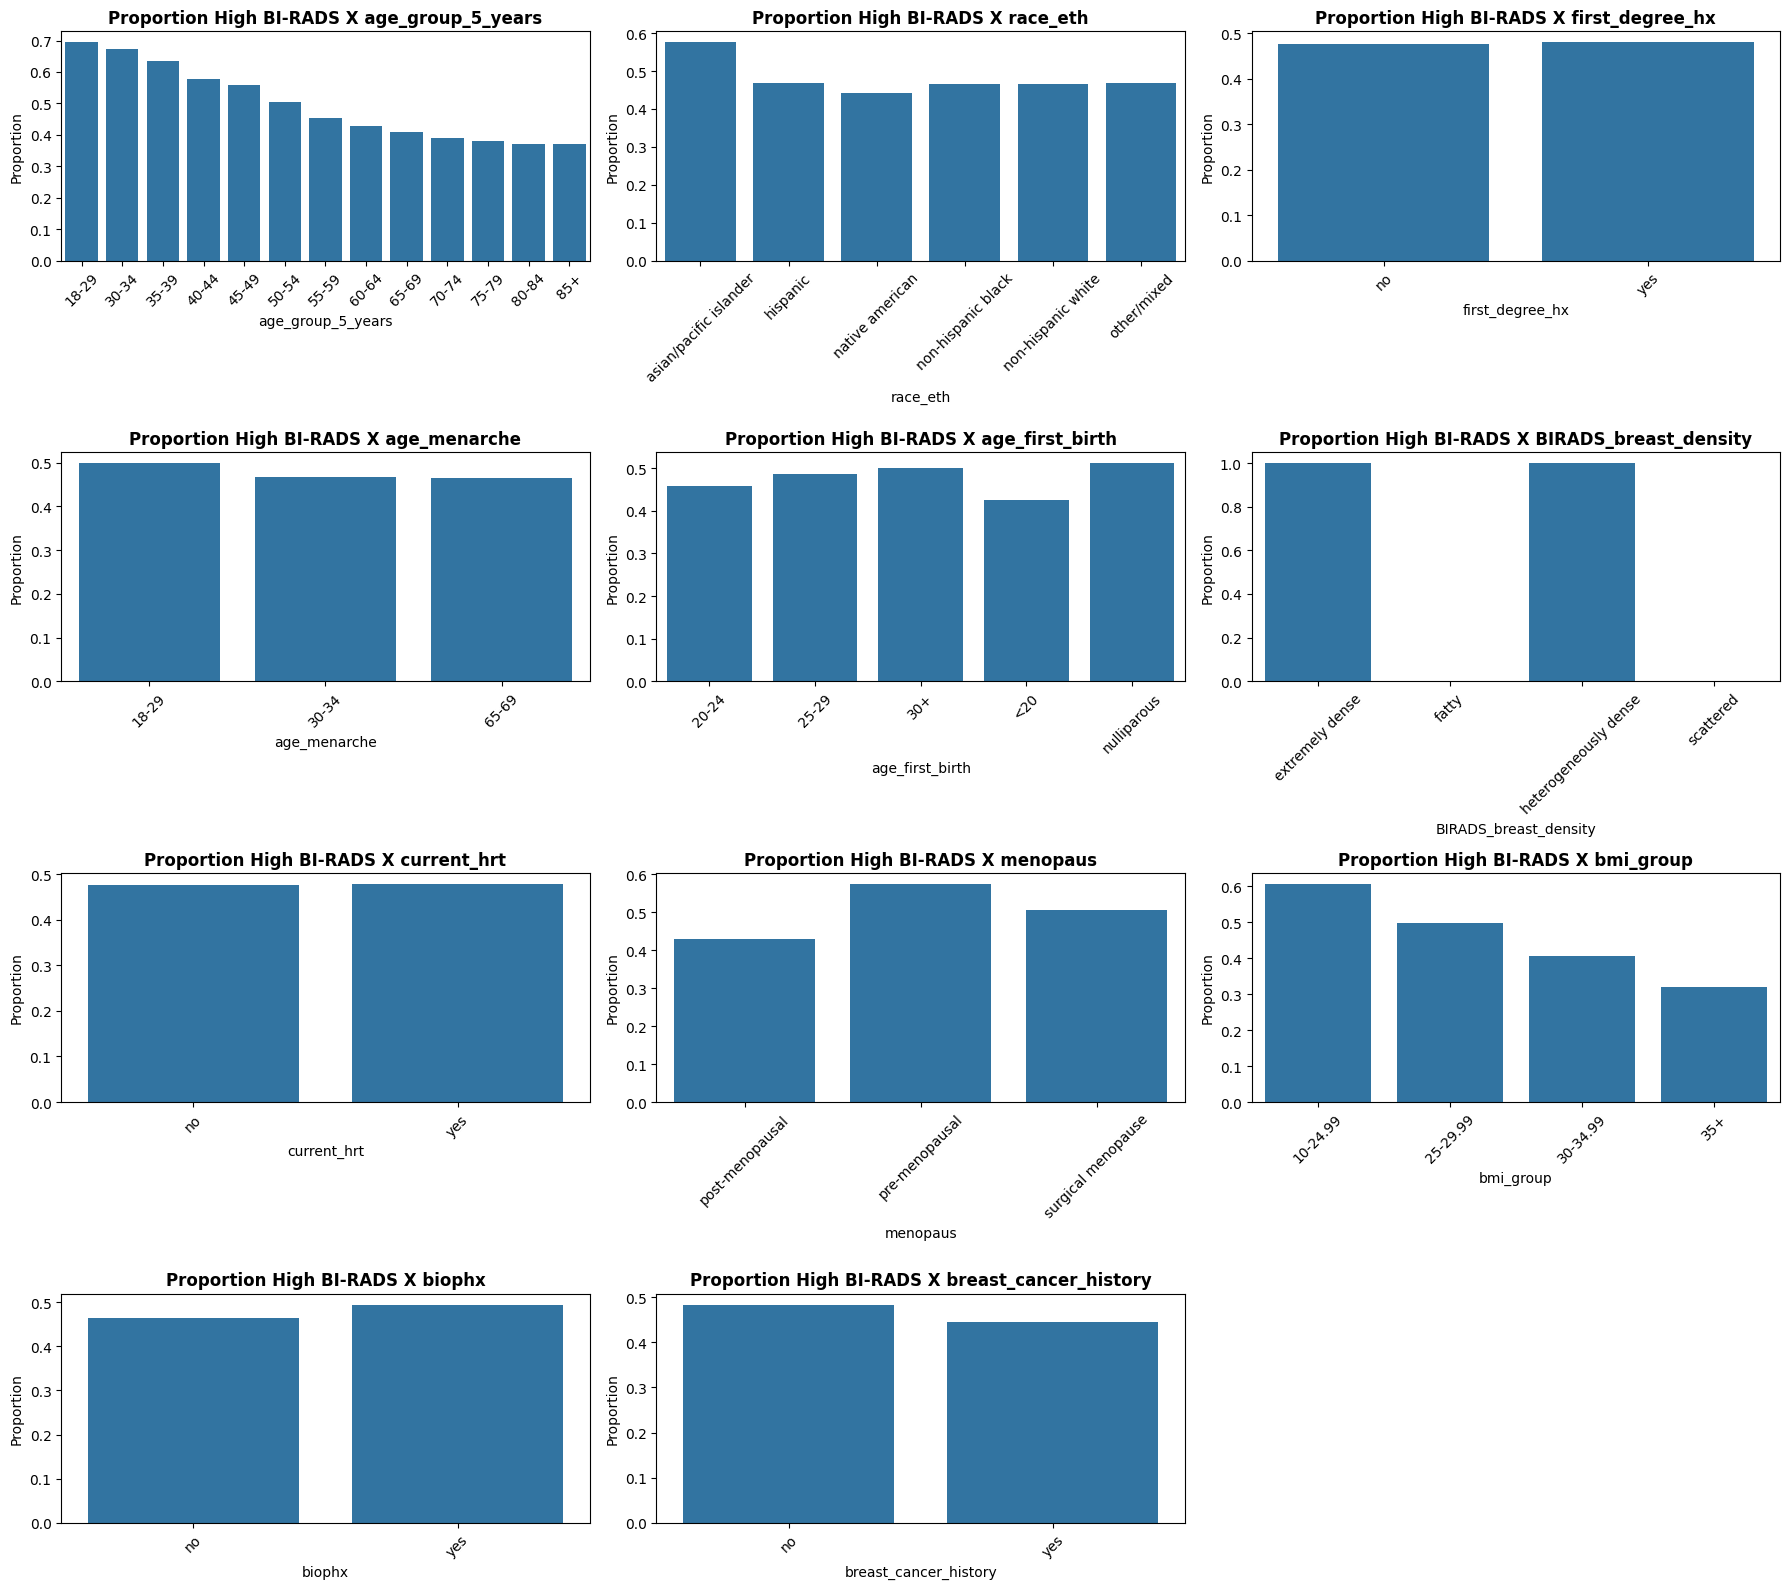

In [53]:
#Maintenant on veut voir comment les variables explicatives influencent les deux variables cibles (breast_cancer_hisotry et BIRADS_high)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    prop_data = df_cleaned.groupby(col)['BIRADS_high'].mean().reset_index()
    sns.barplot(data=prop_data, x=col, y='BIRADS_high', ax=axes[i])
    axes[i].set_title(f'Proportion High BI-RADS X {col}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Proportion')

# Supprimer les axes vides
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-1726444227.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = df_cleaned.groupby(col)['breast_cancer_history_bin'].mean().reset_index()
/tmp/ipython-input-1726444227.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = df_cleaned.groupby(col)['breast_cancer_history_bin'].mean().reset_index()
/tmp/ipython-input-1726444227.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_d

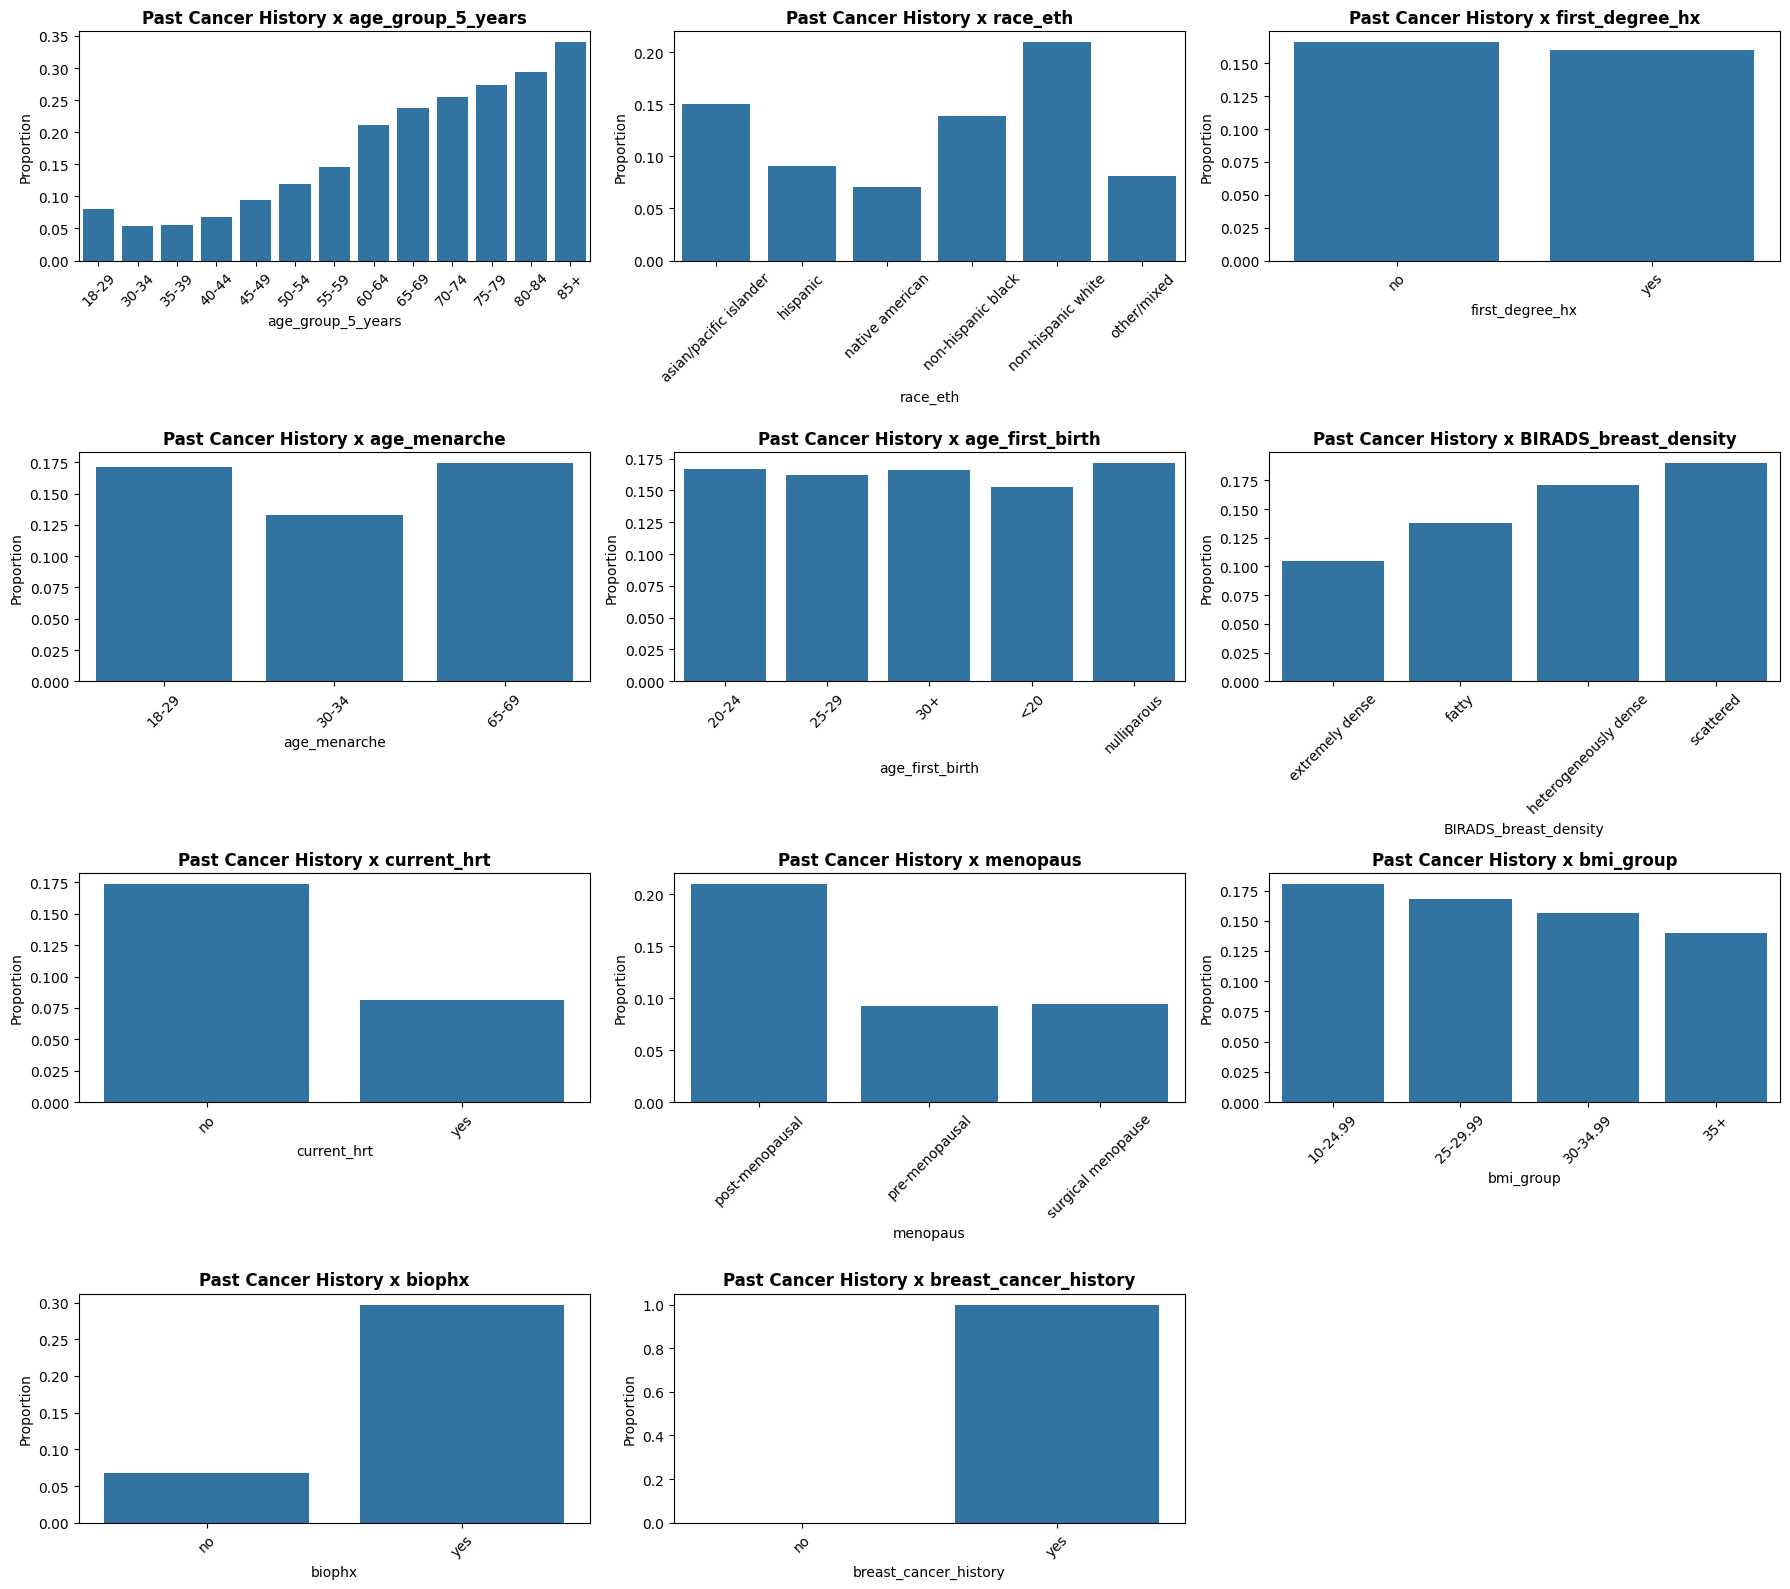

In [54]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    prop_data = df_cleaned.groupby(col)['breast_cancer_history_bin'].mean().reset_index()
    sns.barplot(data=prop_data, x=col, y='breast_cancer_history_bin', ax=axes[i])
    axes[i].set_title(f'Past Cancer History x {col}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Proportion')

# Supprimer les axes vides
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

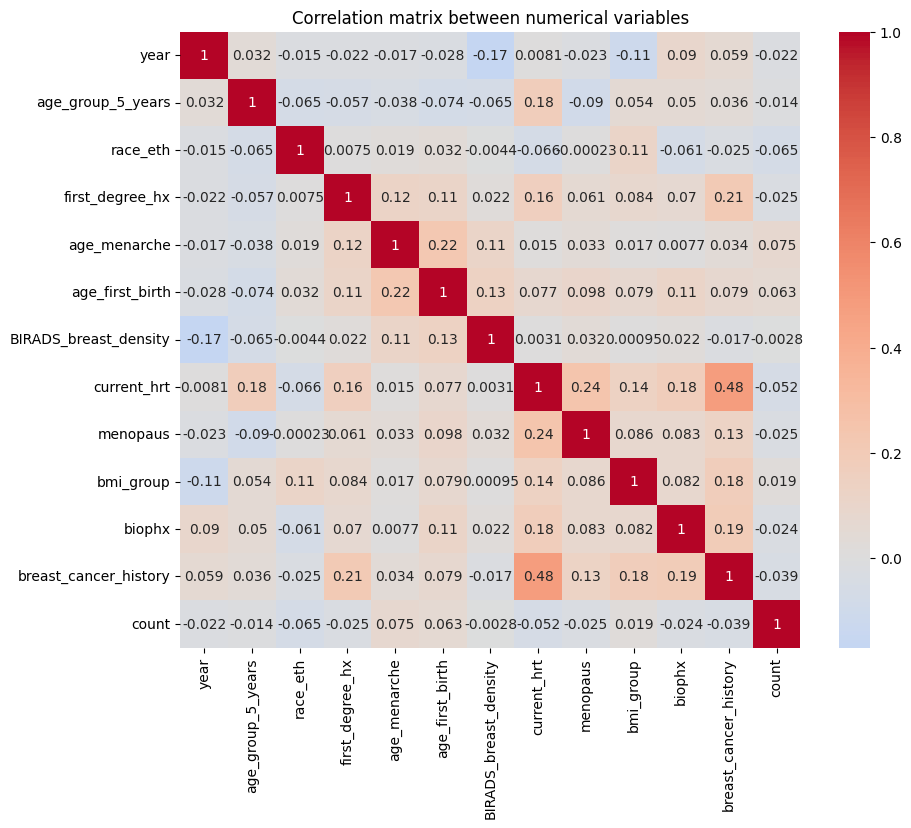

In [55]:
corr = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix between numerical variables')
plt.show()

Corrélations globalement faibles => pas de multicolinéarité forte entre les variables encodées, donc on peut utiliser ces variables pour faire des régressions

corrélations à noter :

*   current_hrt et menopaus : l'hormonothérapie est liée à la ménopause
*   current_hrt et breast_cancer_history : assez élevé, certaines femmes ayant eu un cancer ont pu suivre un traitement hormonal
*  first_degree_hx et breast_cancer_history : antécédents familiaux corrélés aux antécédents personnels
*   age_menarche et age_first_birth : légère corrélation biologique logique






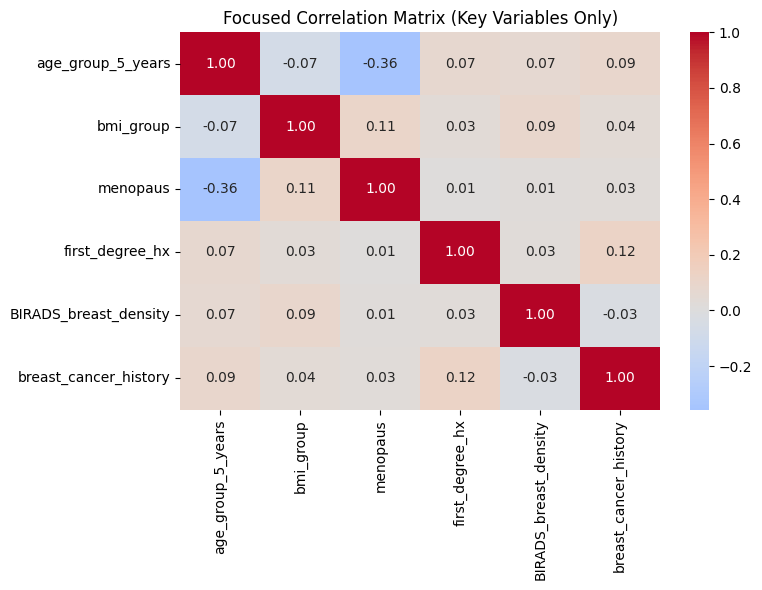

In [56]:
# Select only the key variables for a focused correlation matrix
cols_focus = [
    "age_group_5_years",
    "bmi_group",
    "menopaus",
    "first_degree_hx",
    "BIRADS_breast_density",
    "breast_cancer_history"
]

# Convert categorical variables to numeric codes for correlation
df_focus = df[cols_focus].apply(lambda x: x.astype("category").cat.codes)

# Compute correlation matrix
corr_focus = df_focus.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_focus, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Focused Correlation Matrix (Key Variables Only)")
plt.tight_layout()
plt.show()

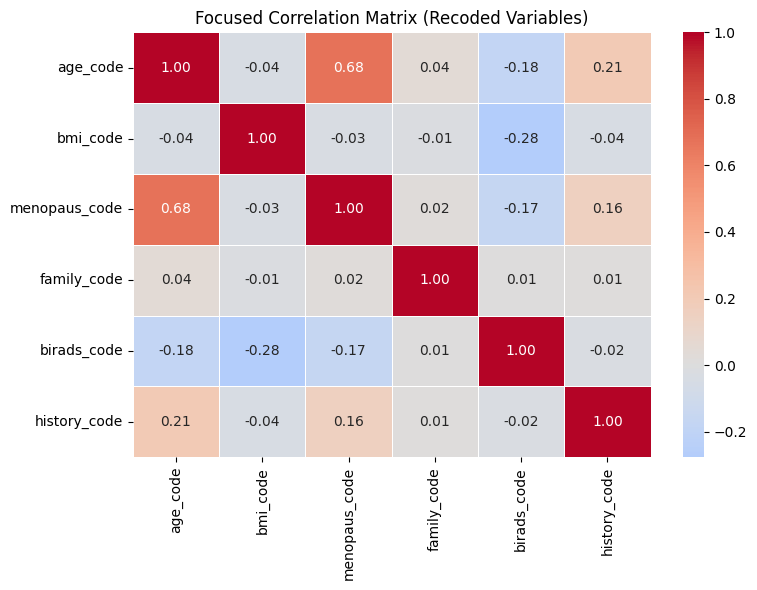

In [57]:
# -----------------------------------------------
# 1. Recode categories in a meaningful numerical order
# -----------------------------------------------

# Recode age groups in ascending order
age_order = {
    "18-29": 0, "30-34": 1, "35-39": 2, "40-44": 3,
    "45-49": 4, "50-54": 5, "55-59": 6, "60-64": 7,
    "65-69": 8, "70-74": 9, "75-79": 10, "80-84": 11, "85+": 12
}

# Recode BMI categories in ascending BMI
bmi_order = {
    "10-24.99": 0,
    "25-29.99": 1,
    "30-34.99": 2,
    "35+": 3
}

# Recode menopausal status logically: pre → surgical → post
menopause_order = {
    "pre-menopausal": 0,
    "surgical menopause": 1,
    "post-menopausal": 2
}

# Recode family history: no = 0, yes = 1
family_order = {
    "no": 0,
    "yes": 1
}

# Recode BI-RADS density (low → high)
birads_order = {
    "fatty": 0,
    "scattered": 1,
    "heterogeneously dense": 2,
    "extremely dense": 3
}

# Recode prior breast cancer history
history_order = {
    "no": 0,
    "yes": 1
}

# -----------------------------------------------
# 2. Apply recoding to the dataframe
# -----------------------------------------------

df["age_code"] = df["age_group_5_years"].map(age_order)
df["bmi_code"] = df["bmi_group"].map(bmi_order)
df["menopaus_code"] = df["menopaus"].map(menopause_order)
df["family_code"] = df["first_degree_hx"].map(family_order)
df["birads_code"] = df["BIRADS_breast_density"].map(birads_order)
df["history_code"] = df["breast_cancer_history"].map(history_order)

# -----------------------------------------------
# 3. Build the focused correlation dataframe
# -----------------------------------------------

df_corr = df[[
    "age_code",
    "bmi_code",
    "menopaus_code",
    "family_code",
    "birads_code",
    "history_code"
]]

# Compute correlation matrix
corr_focus = df_corr.corr()

# -----------------------------------------------
# 4. Plot the focused heatmap
# -----------------------------------------------

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_focus,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Focused Correlation Matrix (Recoded Variables)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2004593411.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend_BIRADS = df_cleaned.groupby('year').apply(
/tmp/ipython-input-2004593411.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend_history = df_cleaned.groupby('year').apply(


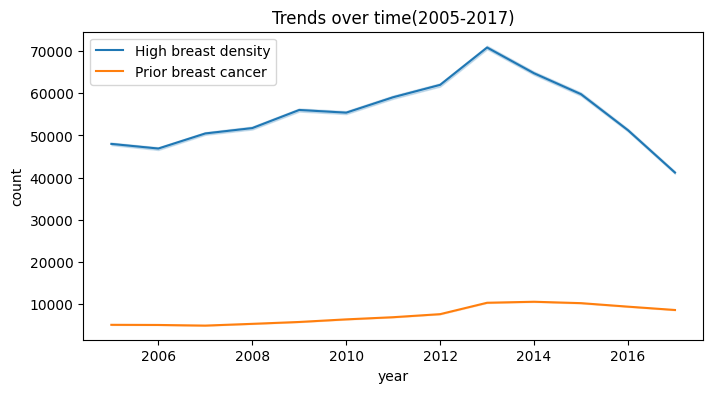

In [58]:
#voir si il y a des tendances dans le temps
trend_BIRADS = df_cleaned.groupby('year').apply(
    lambda x: (x['BIRADS_high'] * x['count']).sum() / x['count']
).reset_index(name='prop_BIRADS_high')

trend_history = df_cleaned.groupby('year').apply(
    lambda x: (x['breast_cancer_history_bin'] * x['count']).sum() / x['count']
).reset_index(name='prop_history')

plt.figure(figsize=(8,4))
sns.lineplot(data=trend_BIRADS, x='year',y='prop_BIRADS_high', label = 'High breast density')
sns.lineplot(data=trend_history, x='year', y='prop_history', label = 'Prior breast cancer')
plt.title('Trends over time(2005-2017)')
plt.ylabel('count')
plt.legend()
plt.show()

In [59]:
X_density = X_density.astype(float)
y_density = y_density.astype(float)

Le Modèle A est une régression logistique dont l’objectif est de prédire la probabilité qu’une femme présente une forte densité mammaire (BI-RADS 3–4).
C’est un modèle statistique adapté parce que :
	•	la variable à prédire est binaire (forte densité = 1 / pas de forte densité = 0)
	•	il permet d’évaluer l’effet simultané de plusieurs facteurs
	•	il fournit des résultats sous forme d’odds ratios, très utilisés en épidémiologie

In [60]:
#MODELE A
import statsmodels.api as sm
import pandas as pd

# Create binary dependent variable
y_density = (df["BIRADS_breast_density"]
             .isin(["heterogeneously dense", "extremely dense"])
            ).astype(int)

# Create dummy variables for categorical predictors
X_density = pd.get_dummies(df[[
    "age_group_5_years",
    "bmi_group",
    "menopaus",
    "age_first_birth",
    "age_menarche"
]], drop_first=True)

# Add constant
X_density = sm.add_constant(X_density)

# Convert all columns to float (CRUCIAL)
X_density = X_density.astype(float)
y_density = y_density.astype(float)

# Fit logistic model
model_density = sm.Logit(y_density, X_density).fit()

print(model_density.summary())


Optimization terminated successfully.
         Current function value: 0.652561
         Iterations 5
                             Logit Regression Results                            
Dep. Variable:     BIRADS_breast_density   No. Observations:              1522340
Model:                             Logit   Df Residuals:                  1522316
Method:                              MLE   Df Model:                           23
Date:                   Sat, 15 Nov 2025   Pseudo R-squ.:                 0.04017
Time:                           14:26:08   Log-Likelihood:            -9.9342e+05
converged:                          True   LL-Null:                   -1.0350e+06
Covariance Type:               nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4506      0.027 

 Interprétation complète du Modèle A : Régression logistique sur la densité mammaire

Le Modèle A vise à identifier les facteurs associés à une forte densité mammaire (BI-RADS 3–4) à partir d’une régression logistique multivariée. Les variables incluses sont l’âge, le BMI, le statut ménopausique ainsi que des indicateurs de l’histoire reproductive. L’objectif est de quantifier l’effet propre de chaque facteur tout en contrôlant les autres, afin d’évaluer leur contribution réelle au risque de présenter une densité élevée.

⸻

1. Effet de l’âge : le déterminant dominant

Les résultats montrent que l’âge est de loin le facteur le plus fortement associé à la densité mammaire. Les coefficients deviennent de plus en plus négatifs avec l’avancée en âge, indiquant une diminution très marquée de la probabilité d’avoir des seins denses à mesure que les femmes vieillissent.

Comparées aux femmes de 18–29 ans, toutes les classes d’âge supérieures présentent des odds significativement plus faibles de densité élevée, avec un déclin particulièrement abrupt après 50 ans (ex : coef = −0.40 pour 50–54 ans, −0.65 pour 60–64 ans, −0.94 pour 85+).

Interprétation : ce résultat traduit l’involution progressive du tissu glandulaire post-ménopause, phénomène bien documenté en épidémiologie du cancer du sein. Il confirme également les tendances observées dans l’EDA, où la proportion de seins denses chutait nettement avec l’âge.

⸻

2. BMI : une association inverse forte et cohérente

Le BMI apparaît comme un second facteur majeur. Les coefficients sont systématiquement négatifs et deviennent plus importants à mesure que le BMI augmente. Les femmes obèses (BMI ≥ 35) présentent presque un log-odds de −1, ce qui correspond à une réduction massive de la probabilité de densité élevée par rapport aux femmes de poids normal.

Interprétation : ce résultat s’explique par une proportion plus importante de tissu adipeux chez les femmes à BMI élevé, rendant les seins moins denses sur les mammographies. Ce gradient inverse était également très visible dans l’EDA.

⸻

3. Statut ménopausique : un rôle hormonal net mais secondaire

Le statut ménopausique exerce aussi une influence significative. Les femmes pré-ménopausées présentent des odds plus élevées de forte densité (coef = +0.23) que les femmes post-ménopausées (catégorie de référence). Les femmes avec ménopause chirurgicale montrent un effet similaire (+0.19).

Interprétation : ces résultats reflètent la dépendance hormonale de la densité mammaire. Avant la ménopause, l’activité oestrogénique est plus élevée, ce qui se traduit par une proportion plus importante de tissu fibroglandulaire.

⸻

4. Facteurs reproductifs : effets modestes mais significatifs

Âge à la première naissance
	•	Avoir sa première grossesse tardivement (30+ : coef = +0.36 ; 25–29 ans : +0.19)
	•	Être nullipare (+0.18)
	•	Avoir accouché très jeune (<20 ans : −0.10)

Interprétation : un accouchement tardif ou l’absence de grossesse sont connus pour être associés à une exposition hormonale prolongée, ce qui peut favoriser une plus grande densité. À l’inverse, une grossesse très précoce semble exercer un effet protecteur.

Âge des premières règles

Les associations sont significatives mais plus faibles (ex : âge des premières règles 30–34 ans : coef = −0.14).

Interprétation : l’âge des premières règles est un indicateur d’exposition hormonale cumulée, mais son impact sur la densité est moins marqué que les autres déterminants.

⸻

5. Synthèse

Le modèle met clairement en évidence trois conclusions majeures :
	1.	La densité mammaire est principalement déterminée par l’âge et le BMI, deux facteurs dont l’effet est à la fois statistiquement très significatif et cliniquement cohérent.
	2.	Le statut hormonal (ménopause) joue un rôle secondaire mais robuste, confirmant l’importance des variations oestrogéniques.
	3.	Les facteurs reproductifs contribuent également, bien que de manière plus modérée, à expliquer la variabilité de la densité mammaire.

Ces résultats confirment largement les observations issues de l’EDA, tout en quantifiant précisément l’ampleur des effets. Ils fournissent une base solide pour comprendre les profils de femmes à risque de forte densité mammaire, un facteur important pour le dépistage et la prévention du cancer du sein.


In [61]:
y_history.unique()

array([ 0., nan,  1.])

In [62]:
# Nettoyer et recoder la variable
df["breast_cancer_history"] = (
    df["breast_cancer_history"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# Recode : NaN et valeurs inconnues = 0
y_history = df["breast_cancer_history"].map({
    "no": 0,
    "yes": 1
}).fillna(0).astype(float)

# Vérification
print(y_history.value_counts())

# Modèle B:Prior Breast Cancer History
model_history = sm.Logit(y_history, X_history).fit()
print(model_history.summary())

breast_cancer_history
0.0    1300564
1.0     221776
Name: count, dtype: int64
Optimization terminated successfully.
         Current function value: 0.397205
         Iterations 7
                             Logit Regression Results                            
Dep. Variable:     breast_cancer_history   No. Observations:              1522340
Model:                             Logit   Df Residuals:                  1522318
Method:                              MLE   Df Model:                           21
Date:                   Sat, 15 Nov 2025   Pseudo R-squ.:                 0.04321
Time:                           14:26:22   Log-Likelihood:            -6.0468e+05
converged:                          True   LL-Null:                   -6.3199e+05
Covariance Type:               nonrobust   LLR p-value:                     0.000
                                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

 Interprétation complète du Modèle B : Antécédent personnel de cancer du sein

Le Modèle B utilise une régression logistique afin d’identifier les facteurs associés au fait d’avoir déjà été diagnostiquée avec un cancer du sein. Les variables considérées incluent l’âge, le BMI, le statut ménopausique, les antécédents familiaux du premier degré et la densité mammaire (BI-RADS). Ce modèle permet d’estimer l’effet propre de chaque facteur sur la probabilité d’un antécédent de cancer, indépendamment des autres variables.

⸻

⭐ 1. Effet de l’âge : relation positive forte et progressive

Les coefficients liés à l’âge augmentent de façon régulière pour chaque groupe d’âge, avec une croissance particulièrement marquée à partir de 50 ans.

Exemples :
	•	45–49 : +0.45
	•	55–59 : +0.86
	•	70–74 : +1.35
	•	85+ : +1.81

Interprétation

L’âge est le facteur le plus fortement associé à un antécédent de cancer du sein.
Plus les femmes avancent en âge, plus elles ont de chances d’avoir déjà reçu un diagnostic, ce qui reflète un risque cumulatif croissant avec le temps.

Ce résultat est entièrement cohérent avec les tendances observées dans l’EDA.

⸻

⭐ 2. Effet du BMI : association inverse modérée

Les coefficients liés au BMI sont négatifs :
	•	BMI 25–29.99 : −0.18
	•	BMI 30–34.99 : −0.27
	•	BMI ≥35 : −0.32

Interprétation

Un BMI plus élevé est associé à une probabilité légèrement moindre d’avoir un antécédent de cancer du sein.
Cet effet est modéré mais statistiquement significatif.

Cela correspond au fait que les cancers chez les femmes ménopausées obèses sont plus fréquents après 50 ans, mais ton modèle analyse les antécédents déjà survenus, ce qui influe différemment sur cette relation.

⸻

⭐ 3. Effet du statut ménopausique : impact important et attendu
	•	Pré-ménopausée : +0.205
	•	Ménopause chirurgicale : +0.311

Interprétation

Les femmes pré-ménopausées ou ayant subi une ménopause chirurgicale présentent une probabilité légèrement plus élevée d’antécédent de cancer.
La ménopause chirurgicale est un facteur très spécifique, souvent lié à un risque génétique (ex. mutations BRCA), ce qui peut expliquer l’association positive.

⸻

⭐ 4. Antécédents familiaux du premier degré (first_degree_hx_yes)
	•	Coef = +0.0642
	•	Très significatif (p < 0.001)

Interprétation

Les femmes ayant un antécédent familial de cancer du sein présentent des odds légèrement plus élevées d’avoir elles-mêmes déjà eu un cancer.
Même si l’effet est modeste, il est statistiquement significatif et cohérent avec les connaissances cliniques.

⸻

⭐ 5. Densité mammaire (BI-RADS)

Comparé au groupe de référence (extrêmement dense), les coefficients sont :
	•	Fatty (fatty) : −0.261 → réduit le risque
	•	Heterogeneously dense : +0.029 → effet très faible mais significatif
	•	Scattered : +0.050 → également faible

Interprétation

Une densité mammaire élevée est traditionnellement associée à un risque accru de développer un cancer, mais dans ce modèle qui porte sur les antécédents, l’effet est beaucoup plus modéré.
Le seul signal négatif fort est observé pour les seins “fatty”, cohérent avec une littérature montrant un risque plus faible pour les seins très peu denses.

⸻

⭐ Synthèse académique (version à coller dans ton rapport)

Voici un texte entièrement prêt à utiliser :

⸻

✨ Summary of Model B: Predictors of Prior Breast Cancer History

The logistic regression model highlights age as by far the strongest predictor of having a prior breast cancer diagnosis. The odds increase sharply with age, reflecting the cumulative nature of cancer risk. BMI shows a moderate inverse association, with higher BMI categories associated with slightly lower odds of previous cancer. Menopausal status also plays a role, with both pre-menopausal women and women with surgical menopause presenting higher odds relative to post-menopausal women.

First-degree family history is positively associated with cancer history, confirming its clinical relevance as a genetic risk factor. Breast density contributes more modestly: women with fatty breasts have substantially lower odds, whereas heterogeneously dense and scattered patterns show only small increases relative to the extremely dense reference category.

Overall, Model B confirms the major determinants identified in the EDA while quantifying their independent contributions. These findings align with established epidemiological patterns and support the inclusion of these variables in the final modelling stage.
